A continuación se muestra una matriz de expresión genética:

In [1]:
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,⋯,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,⋯,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,⋯,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,⋯,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,⋯,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,⋯,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [2]:
#verificamos filas y columnas que tiene nuestro dataset
ncol(genexp)
nrow(genexp)

[1] 482

[1] 86

In [3]:
#cargamos libreria
library(ggplot2)
set.seed(1234)

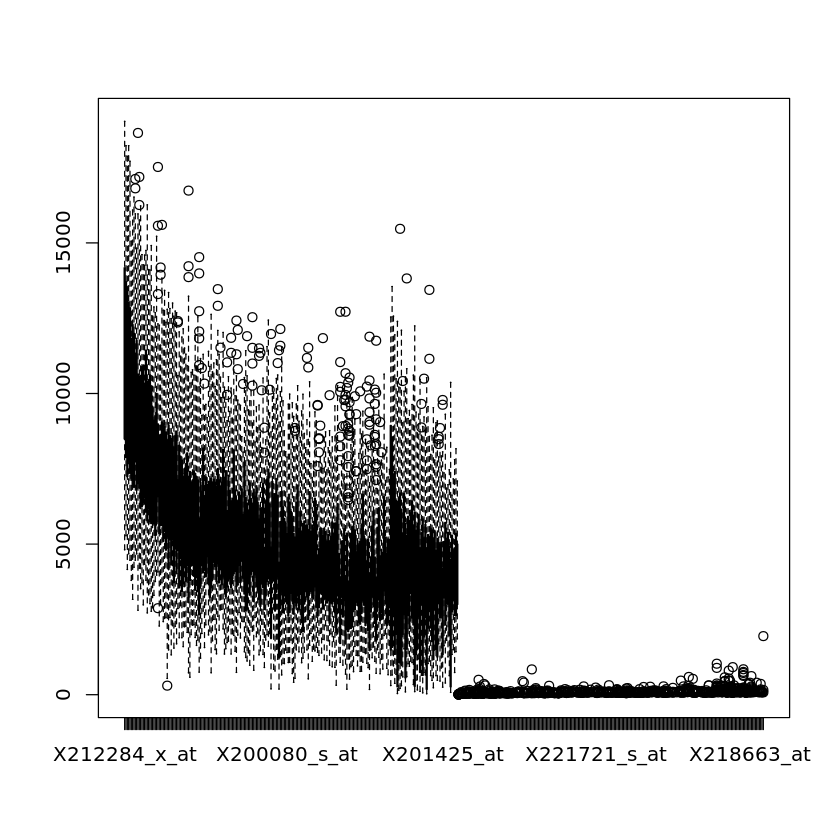

In [4]:
#dibujamos dataset
boxplot(genexp[,2:482])
#plot(genexp[,482:482], t='o')

### Limpieza de datos:

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

In [5]:
#outliers
genexp2<-genexp
for (i in 2:ncol(genexp2)){
    x <- genexp2[, i]
    qnt  <- quantile(x, probs = c(.25, .75), na.rm = T)
    caps <- quantile(x, probs = c(.1, .90), na.rm = T)    
    H <- 3 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    genexp2[, i] <- x
}

In [6]:
#normalizar y quitar nas
genexp3 <- genexp2
for (i in 2:ncol(genexp3)) {
    media <- mean (genexp3[,i], na.rm=T)
    desviacion <- sd(genexp3[,i], na.rm=T)
    
    genexp3[is.na(genexp3[,i]),i] <- media
    genexp3[,i] <- (genexp3[,i]-media)/desviacion
}

In [7]:
#crear columna con factor
genexp4 <- genexp3
genexp4$type = NA
genexp4$type[grepl("Normal",genexp4$X)] = "Normal"
genexp4$type[grepl("Cancer",genexp4$X)] = "Cancer"
genexp4$type <- as.factor(genexp4$type)
genexp4$X <- genexp4$type
genexp4$type <- NULL
str(genexp4$X)

 Factor w/ 2 levels "Cancer","Normal": 2 1 2 1 2 1 2 1 2 1 ...


In [8]:
head(genexp4)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal,-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,⋯,-0.9819469,-0.3608567,-0.4267964,-0.3357943,-0.9473334,-0.6923526,-0.4336294,-0.6732049,1.5176937,-0.89224324
Cancer,-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,⋯,-0.8130644,1.2376754,-0.9261639,-1.4005432,-0.8790398,-0.9679607,-1.3629316,-0.5231380,0.9096190,-0.61943400
Normal,-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,⋯,-0.3402178,-0.4770206,-0.5773193,-0.2305764,-0.8498308,-0.4658521,-0.9821600,-0.8130349,-0.5667981,0.81104073
Cancer,-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,⋯,0.2109575,-0.4226585,-0.7322822,-0.9018507,-0.3499477,-0.5231062,-0.6400467,-1.0793576,0.2096817,-0.86753251
Normal,-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,⋯,0.1527116,-0.4267307,0.5097343,-0.2999997,-0.1872354,-0.1829361,-0.4311067,-0.8204070,-0.1790570,-0.03248897
Cancer,-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,⋯,-0.6074410,1.0955294,0.1113232,-0.8926497,0.6578058,-0.5011580,-0.1334943,-0.9848426,-0.7577187,-0.95437655


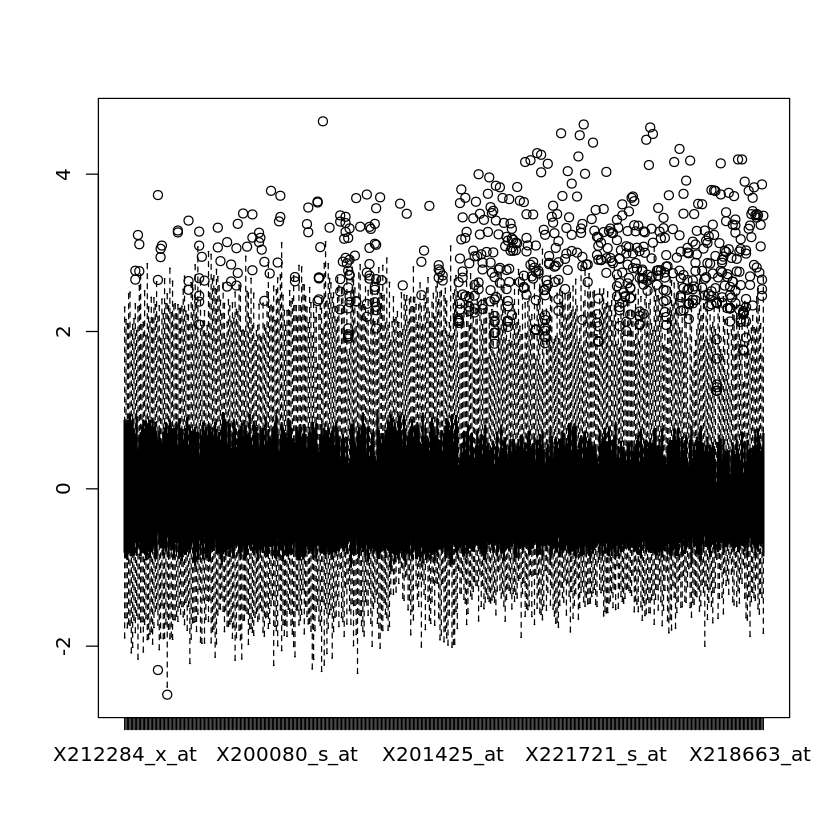

In [9]:
boxplot(genexp4[,2:482])

### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [10]:
#crear conjunto training y test
idx<-sample(1:nrow(genexp4),nrow(genexp4)*0.7)
train<-genexp4[idx,]
test<-genexp4[-idx,]

In [11]:
head(train)
head(test)

,X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
10,Cancer,-1.2725563,-1.2662102,-1.2276752,-1.14678970,-1.118914189,-1.44610349,-1.1879286,-1.1902811,0.09540924,⋯,0.7893519,-0.9907327,-0.93197266,-0.4673467,-0.9525636,-0.9993568,-1.3429187,0.03987081,0.13350039,0.6542815
53,Normal,1.7263728,2.1530768,1.5019251,1.46949693,1.529929811,1.79498263,1.6262096,0.9207536,1.17057672,⋯,-0.1035020,-0.8709811,-0.39008493,-0.3976110,-0.3937677,-0.2212947,2.3273548,-0.54693071,0.50980309,2.6899691
52,Cancer,0.4546535,0.5555506,0.3249009,0.62385224,1.231911446,0.08923465,0.4289167,-0.2498811,-0.77687492,⋯,-0.8985849,-0.9097213,-0.57851645,-0.1320284,-0.5265698,0.1080463,-0.1210419,2.09998312,-1.02875961,-1.0364906
84,Cancer,1.1327777,0.9108720,2.0977751,0.43336773,0.980627271,1.54624044,1.7412124,0.1812646,2.77280176,⋯,-1.1780182,1.3119552,0.91665141,0.7837891,0.1246964,-0.3578314,1.6004263,1.66758771,-0.08277963,1.3646932
71,Normal,0.6376915,0.8287396,0.7416269,0.06599368,0.007274293,0.79550844,0.8566460,0.6106453,-0.64127407,⋯,-0.5543696,-0.6984094,1.22457190,0.4816346,0.7558245,0.4906328,0.1667140,-0.53473721,0.22141826,-0.2056728
83,Normal,0.5653394,0.8314920,0.9715389,0.99292952,1.003035388,0.79216571,0.8807385,0.1888419,1.47807482,⋯,-0.3322795,-0.4264097,0.03300078,-0.1892877,0.1184554,1.3264856,0.3250989,0.30561055,-0.58396996,0.6514557


,X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
2,Cancer,-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.29777761,⋯,-0.8130644,1.2376754,-0.9261639,-1.4005432,-0.87903984,-0.96796072,-1.3629316,-0.5231380,0.9096190,-0.6194340
4,Cancer,-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.05729910,⋯,0.2109575,-0.4226585,-0.7322822,-0.9018507,-0.34994766,-0.52310624,-0.6400467,-1.0793576,0.2096817,-0.8675325
6,Cancer,-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.87061096,⋯,-0.6074410,1.0955294,0.1113232,-0.8926497,0.65780579,-0.50115799,-0.1334943,-0.9848426,-0.7577187,-0.9543766
7,Normal,-1.5990188,-1.58357208,-1.4310045,-1.58982799,-1.4415879,-1.6231915,-1.5406950,-1.66792904,-1.06277546,⋯,0.4369108,-0.2498224,-0.8577618,-0.6656385,-0.04357726,-0.66076537,-1.2056581,-0.7414492,-0.7071891,0.8037632
8,Cancer,-0.6357095,-0.79289045,-0.4606391,-0.25800341,-0.2842166,-0.5509913,-0.4006369,-0.42680347,-1.25730254,⋯,-0.2757433,1.1386125,-0.7015968,-1.0828631,-0.46292148,-0.02517881,-0.5934036,0.7272813,1.1001612,-1.0773129
9,Normal,-0.6172018,-0.57858787,-0.7724456,-0.84105447,-0.8263620,-1.1337006,-0.9740672,-0.75885481,0.08513022,⋯,0.3035337,0.5289658,-0.5236210,-0.9149914,-0.59972362,-0.96746119,-0.4862172,-0.5833542,-0.2435534,-0.1620768


In [12]:
#crear modelo
model<- glm(data=train,formula=X~.,family = binomial(link='logit'))
betalg<-model$coefficients
betalg

(Intercept)            X212284_x_at            X212869_x_at 
              3.1453246              -0.2874313              -3.7877561 
           X213614_x_at            X212391_x_at            X201257_x_at 
             41.1203903              47.9582582             -46.4700108 
        AFFX.hum_alu_at            X206559_x_at            X214003_x_at 
            -37.3885863              33.3303838             -25.3511866 
           X208755_x_at            X200062_s_at            X201429_s_at 
             -4.8188947               0.3937691              -8.7098730 
           X213828_x_at            X200717_x_at            X201891_s_at 
            -60.7041420             -16.6178665             -18.4685214 
           X213477_x_at            X213080_x_at              X200633_at 
           -146.4367799              21.6033545              79.4113602 
             X200926_at            X200933_x_at            X213583_x_at 
             -5.6742347             131.6231857              13.7969235 
           X204892_x_at            X201492_s_at            X200095_x_at 
             24.5409845              26.4061769              -4.5185368 
           X208695_s_at            X207783_x_at               X71933_at 
             28.4027268               8.1179750               1.4356704 
           X200016_x_at            X200741_s_at               X396_f_at 
            -54.5910973              27.4112464              19.5166527 
           X213084_x_at            X200963_x_at            X200099_s_at 
            -36.3061460             -43.0550266              44.9039361 
           X213356_x_at            X211542_x_at            X213347_x_at 
              8.0375597               1.8668456             -89.9957751 
           X201217_x_at            X200032_s_at            X211978_x_at 
             24.7385903             -18.4060114            -227.7854138 
           X201254_x_at            X200817_x_at             X33323_r_at 
            -43.8778562              10.3268201              -4.3371380 
           X211378_x_at            X217740_x_at            X201293_x_at 
             74.2086071             -20.4473330             214.7038854 
           X211073_x_at            X221607_x_at            X212661_x_at 
            -42.2978526             171.6144532            -129.8182003 
           X208825_x_at            X215076_s_at            X213214_x_at 
              1.0298380             -19.7245701              42.3402170 
           X214328_s_at            X212039_x_at            X201033_x_at 
             54.5726214              11.0885979              58.4285307 
           X211970_x_at            X207243_s_at            X201550_x_at 
             50.5061015             -26.8348225            -167.7628884 
             X202088_at            X211983_x_at            X200834_s_at 
            -28.1861946              14.5325802              -1.5380678 
           X211943_x_at            X202649_x_at            X200763_s_at 
                     NA                      NA                      NA 
           X214749_s_at            X212988_x_at            X211765_x_at 
                     NA                      NA                      NA 
           X210646_x_at              X208718_at            X201553_s_at 
                     NA                      NA                      NA 
           X200092_s_at            X208856_x_at            X219071_x_at 
                     NA                      NA                      NA 
           X200809_x_at            X208834_x_at              X200614_at 
                     NA                      NA                      NA 
           X200650_s_at            X211720_x_at            X200088_x_at 
                     NA                      NA                      NA 
           X213414_s_at            X209134_s_at              X201994_at 
                     NA                      NA                      NA 
           X212790_x_at            X201049_s_at            X200958_s_a

In [13]:
y_predict <- predict(model, test)
y_factor <- as.factor(ifelse(y_predict< 0,"Cancer","Normal"))
table(y_factor, test$X)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

        
y_factor Cancer Normal
  Cancer      9      3
  Normal      4     10

In [14]:
#matriz confusion
M<-matrix(rep(0,4),ncol = 2)
y_est=factor(ifelse(predict(model,test)< 0,0,1),labels=c("Cancer","Normal"))

idx_normal<-test$X=="Normal"
idx_cancer<-test$X=="Cancer"


M[1,1]=sum(y_est[idx_cancer]=="Cancer")
M[1,2]=sum(y_est[idx_normal]=="Cancer")
M[2,1]=sum(y_est[idx_cancer]=="Normal")
M[2,2]=sum(y_est[idx_normal]=="Normal")
M

table(y_est,test$X)


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

9,3
4,10


        
y_est    Cancer Normal
  Cancer      9      3
  Normal      4     10

In [15]:
#variables adicionales
paste("Precision:", M[1,1]/(M[1,2]+M[1,1]))
paste("Exhausitivad:", M[1,1]/(M[2,1]+M[1,1]))
paste("Exactitud:",(M[1,1]+M[2,2])/sum(sum(M)))
p<-M[1,1]/(M[1,2]+M[1,1])
e<-M[1,1]/(M[2,1]+M[1,1])
b<-0.5
(1+b^2)*(p*e)/(b^2*p+e)

[1] "Precision: 0.75"

[1] "Exhausitivad: 0.692307692307692"

[1] "Exactitud: 0.730769230769231"

[1] 0.7377049

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 1 rows containing missing values (geom_path).”

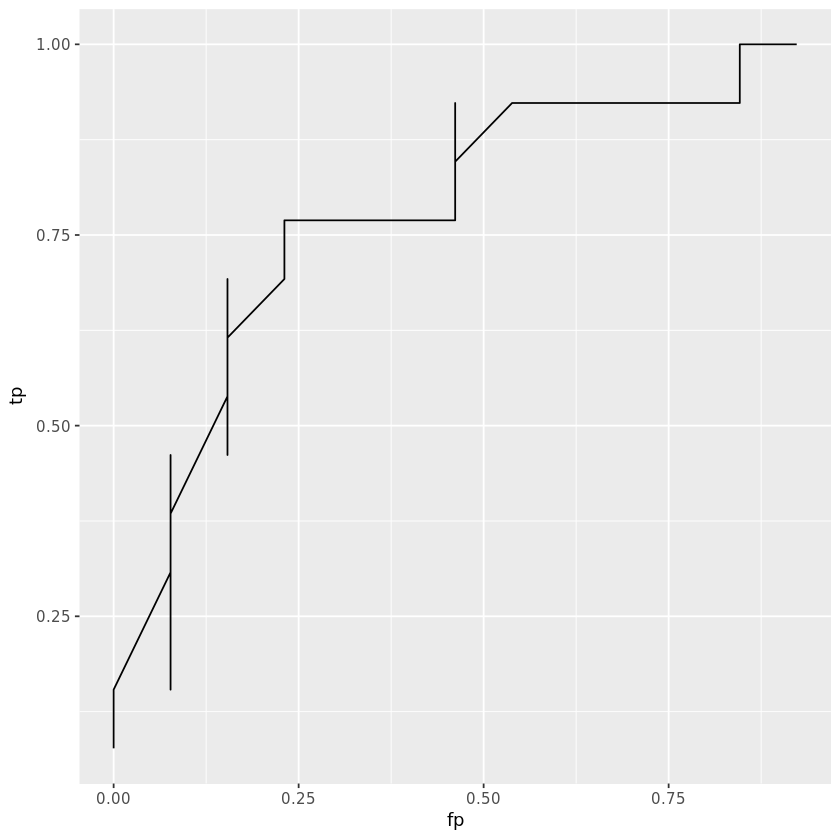

In [16]:
#curva ROC
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_normal<-y_real==1
    idx_cancer <-y_real==0

    M<-table(y_est,test$X)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}


model2<-glm(data=train,formula=X~.,family=binomial(link='logit'))
y_predict<-predict(model2,test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,test$X,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}
dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp))+geom_path()

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

In [17]:
head(genexp4)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal,-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,⋯,-0.9819469,-0.3608567,-0.4267964,-0.3357943,-0.9473334,-0.6923526,-0.4336294,-0.6732049,1.5176937,-0.89224324
Cancer,-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,⋯,-0.8130644,1.2376754,-0.9261639,-1.4005432,-0.8790398,-0.9679607,-1.3629316,-0.5231380,0.9096190,-0.61943400
Normal,-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,⋯,-0.3402178,-0.4770206,-0.5773193,-0.2305764,-0.8498308,-0.4658521,-0.9821600,-0.8130349,-0.5667981,0.81104073
Cancer,-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,⋯,0.2109575,-0.4226585,-0.7322822,-0.9018507,-0.3499477,-0.5231062,-0.6400467,-1.0793576,0.2096817,-0.86753251
Normal,-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,⋯,0.1527116,-0.4267307,0.5097343,-0.2999997,-0.1872354,-0.1829361,-0.4311067,-0.8204070,-0.1790570,-0.03248897
Cancer,-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,⋯,-0.6074410,1.0955294,0.1113232,-0.8926497,0.6578058,-0.5011580,-0.1334943,-0.9848426,-0.7577187,-0.95437655


In [18]:
#k-means
genexp5 <- genexp4
genexp5$X <- NULL
myclust <- kmeans(genexp5,4)
print("Los centroides son:")
myclust$centers
myclust


[1] "Los centroides son:"


,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
1,0.9474397,1.0322960,1.0898037,1.1066763,1.0700029,0.8868995,1.0405401,0.9757044,0.5599657,1.0127028,⋯,0.22735993,-0.31099197,0.5257867,0.6444407,0.5720684,0.5699762,0.6483825,0.4011479,0.3196514,0.4703211
2,-1.0973350,-1.1596092,-1.1404870,-1.1701370,-1.1391307,-1.0315453,-1.1634700,-1.0669226,-0.5693117,-1.0838276,⋯,-0.04423684,0.13379929,-0.4840560,-0.4859644,-0.3969381,-0.3809099,-0.7163652,-0.3650903,-0.3305240,-0.3517905
3,0.6429243,0.5403257,0.4144470,0.2475744,0.2036545,0.7349161,0.4708913,0.3917435,0.8055694,0.6340951,⋯,0.32772910,0.33555160,0.9945409,1.0556118,0.7214068,0.8436889,0.8747185,0.5272935,0.6335604,0.9457436
4,-0.6068163,-0.5998416,-0.6072306,-0.5150197,-0.4733419,-0.6366999,-0.5686593,-0.5230587,-0.6426692,-0.6816967,⋯,-0.39069317,0.06160252,-0.7666382,-0.9259826,-0.7297202,-0.8044077,-0.6733151,-0.4631779,-0.4565635,-0.7721990


K-means clustering with 4 clusters of sizes 28, 18, 14, 26

Cluster means:
  X212284_x_at X212869_x_at X213614_x_at X212391_x_at X201257_x_at
1    0.9474397    1.0322960    1.0898037    1.1066763    1.0700029
2   -1.0973350   -1.1596092   -1.1404870   -1.1701370   -1.1391307
3    0.6429243    0.5403257    0.4144470    0.2475744    0.2036545
4   -0.6068163   -0.5998416   -0.6072306   -0.5150197   -0.4733419
  AFFX.hum_alu_at X206559_x_at X214003_x_at X208755_x_at X200062_s_at
1       0.8868995    1.0405401    0.9757044    0.5599657    1.0127028
2      -1.0315453   -1.1634700   -1.0669226   -0.5693117   -1.0838276
3       0.7349161    0.4708913    0.3917435    0.8055694    0.6340951
4      -0.6366999   -0.5686593   -0.5230587   -0.6426692   -0.6816967
  X201429_s_at X213828_x_at X200717_x_at X201891_s_at X213477_x_at X213080_x_at
1    0.8077100    0.7075075    1.0750218    1.0136042    1.0577458    1.0465336
2   -0.6363914   -0.7837005   -1.1086367   -1.1610047   -1.1383066   -1.0733908


K-means clustering with 8 clusters of sizes 1, 15, 10, 5, 17, 16, 5, 17

Cluster means:
  X212284_x_at X212869_x_at X213614_x_at X212391_x_at X201257_x_at
1   -1.4180320   -1.6112131   -1.4113992   -1.5022968   -1.3777008
2    0.6828959    0.7497969    1.0410064    0.8874073    0.9350053
3   -0.6316453   -0.6439544   -0.6225316   -0.6222782   -0.6287614
4    1.7893559    1.7644047    1.4147603    1.8080397    1.8261069
5   -0.5928219   -0.5726427   -0.6079485   -0.4711050   -0.4026846
6   -1.1072997   -1.1676978   -1.1465576   -1.1699447   -1.1437681
7    0.6526153    0.2338815   -0.0497857    0.1589028    0.2105054
8    0.7691740    0.8959096    0.8162820    0.6651268    0.5060648
  AFFX.hum_alu_at X206559_x_at X214003_x_at X208755_x_at X200062_s_at
1      -2.0845309  -1.78665442  -1.62091544   -1.5975059   -1.2934270
2       0.7959357   0.96437769   0.84841063    0.3471537    0.9937111
3      -0.7990406  -0.60949546  -0.46106881   -0.8367713   -0.8195666
4       1.4222181   1.4836733

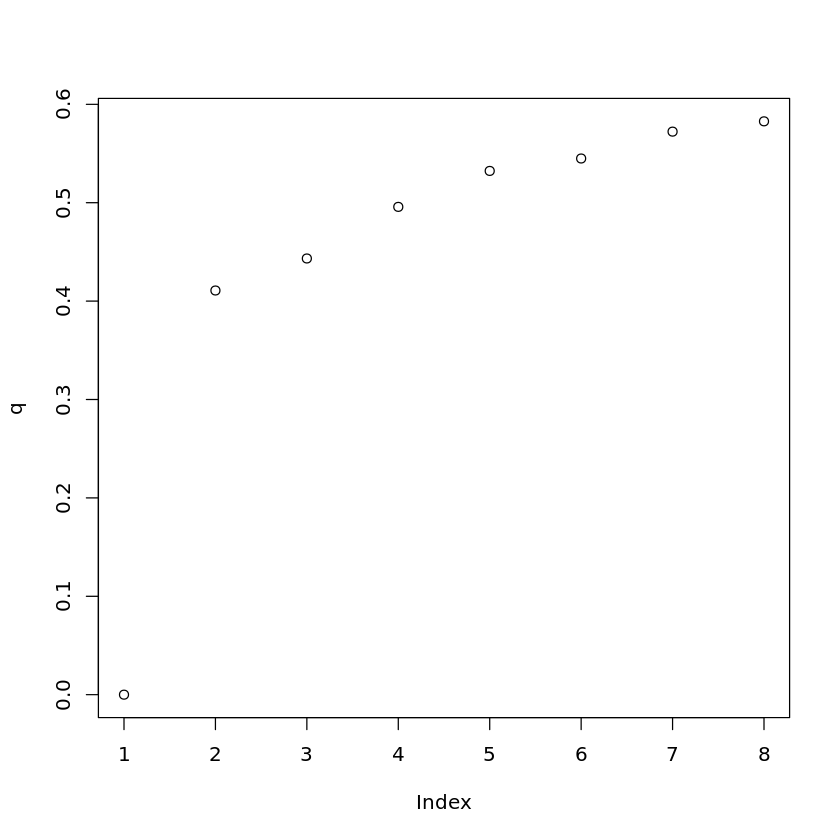

In [19]:
#determinar el número de clusters optimo
q<-c()
for (k in 1:8){
    myclust2<-kmeans(genexp5,k)
    q[k]<-myclust2$betweenss/myclust2$totss
}
plot(q)
myclust2

In [20]:
#dibujar cluster para seleccionar
table(genexp4$X, myclust$cluster)
myclust

        
          1  2  3  4
  Cancer 15  6  4 18
  Normal 13 12 10  8

K-means clustering with 4 clusters of sizes 28, 18, 14, 26

Cluster means:
  X212284_x_at X212869_x_at X213614_x_at X212391_x_at X201257_x_at
1    0.9474397    1.0322960    1.0898037    1.1066763    1.0700029
2   -1.0973350   -1.1596092   -1.1404870   -1.1701370   -1.1391307
3    0.6429243    0.5403257    0.4144470    0.2475744    0.2036545
4   -0.6068163   -0.5998416   -0.6072306   -0.5150197   -0.4733419
  AFFX.hum_alu_at X206559_x_at X214003_x_at X208755_x_at X200062_s_at
1       0.8868995    1.0405401    0.9757044    0.5599657    1.0127028
2      -1.0315453   -1.1634700   -1.0669226   -0.5693117   -1.0838276
3       0.7349161    0.4708913    0.3917435    0.8055694    0.6340951
4      -0.6366999   -0.5686593   -0.5230587   -0.6426692   -0.6816967
  X201429_s_at X213828_x_at X200717_x_at X201891_s_at X213477_x_at X213080_x_at
1    0.8077100    0.7075075    1.0750218    1.0136042    1.0577458    1.0465336
2   -0.6363914   -0.7837005   -1.1086367   -1.1610047   -1.1383066   -1.0733908


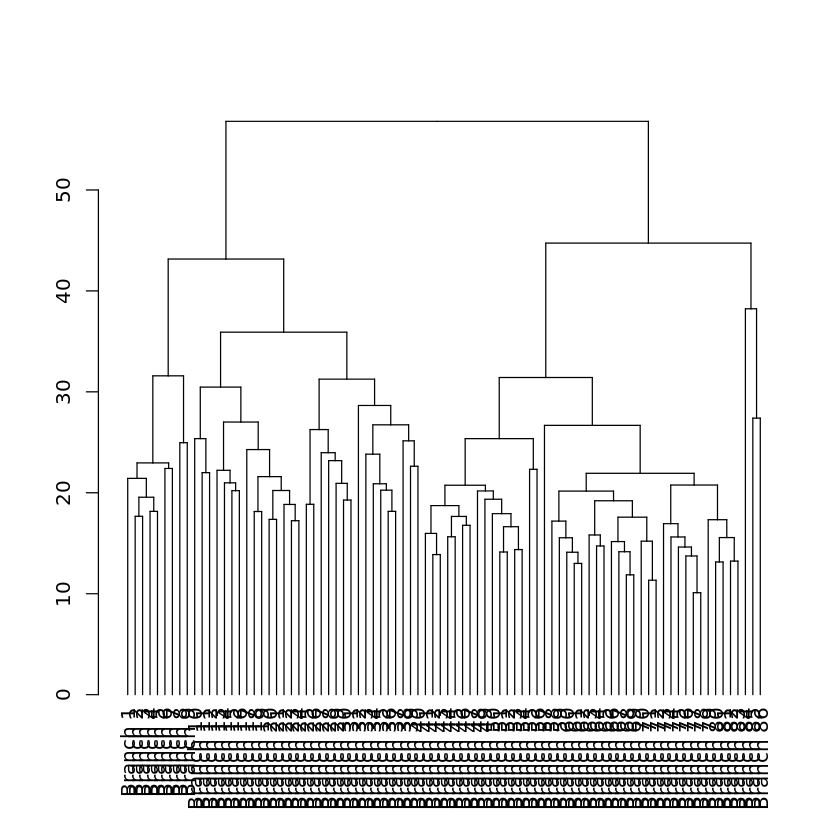

In [21]:
#dendrograma
d <- dist(as.matrix(genexp5),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)

plot(cut(hcd,h=5)$upper)


In [22]:
table(genexp4$X, cutree(hc,4))

        
          1  2  3  4
  Cancer 24  1  1 17
  Normal 19  2  8 14

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

In [23]:
head(genexp4)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal,-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,⋯,-0.9819469,-0.3608567,-0.4267964,-0.3357943,-0.9473334,-0.6923526,-0.4336294,-0.6732049,1.5176937,-0.89224324
Cancer,-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,⋯,-0.8130644,1.2376754,-0.9261639,-1.4005432,-0.8790398,-0.9679607,-1.3629316,-0.5231380,0.9096190,-0.61943400
Normal,-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,⋯,-0.3402178,-0.4770206,-0.5773193,-0.2305764,-0.8498308,-0.4658521,-0.9821600,-0.8130349,-0.5667981,0.81104073
Cancer,-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,⋯,0.2109575,-0.4226585,-0.7322822,-0.9018507,-0.3499477,-0.5231062,-0.6400467,-1.0793576,0.2096817,-0.86753251
Normal,-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,⋯,0.1527116,-0.4267307,0.5097343,-0.2999997,-0.1872354,-0.1829361,-0.4311067,-0.8204070,-0.1790570,-0.03248897
Cancer,-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,⋯,-0.6074410,1.0955294,0.1113232,-0.8926497,0.6578058,-0.5011580,-0.1334943,-0.9848426,-0.7577187,-0.95437655


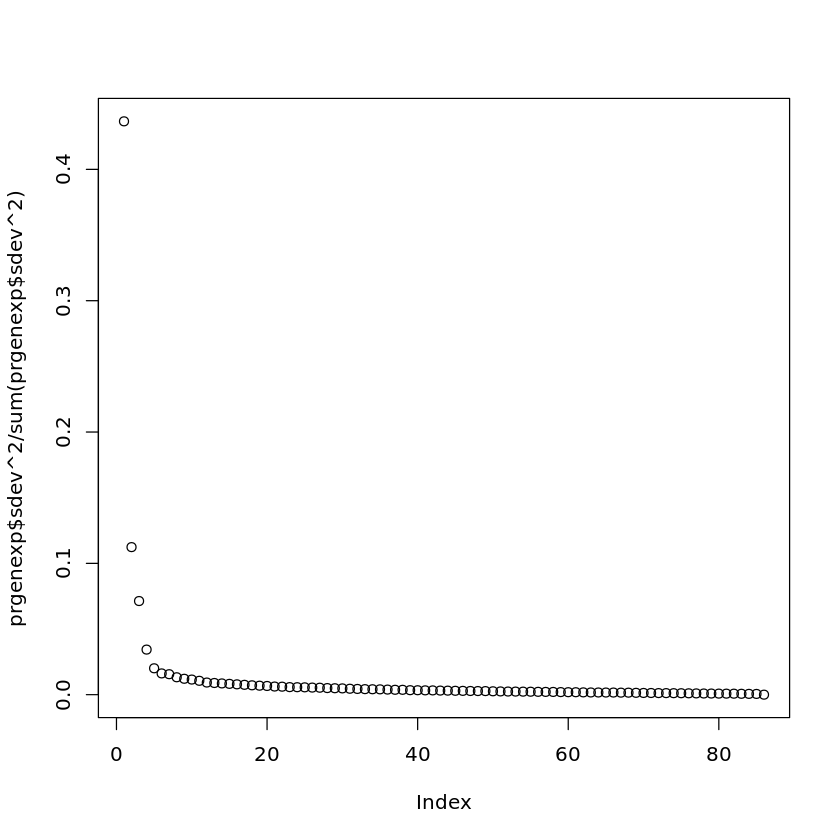

In [24]:
#Utilizamos prcomp para calcular el pca
prgenexp <- prcomp(genexp5, center = FALSE, scale = FALSE)
#Comprobamos que los cuatro primeros autovalores contienen aproximadamente el 90% de la varianza
plot(prgenexp$sdev^2/sum(prgenexp$sdev^2))


In [25]:
head(genexp4$X)

[1] Normal Cancer Normal Cancer Normal Cancer
Levels: Cancer Normal

In [26]:
#seleccionamos las dos primeras dimensiones
genexp_data<-data.frame(genexp4$X,prgenexp$x[,1:6])
 
head(genexp_data)

genexp4.X,PC1,PC2,PC3,PC4,PC5,PC6
Normal,-15.94940,4.7079181,0.2699942,-4.0041071,3.2339762,-0.7883760
Cancer,-10.30823,-11.0366064,1.0467453,-1.4893848,4.9797102,-0.5932684
Normal,-14.43158,5.5607710,-2.1329351,-3.2347494,0.1556822,1.1492117
Cancer,-11.97688,-2.2134760,4.7827311,-0.7240811,0.2561225,3.5906889
Normal,-10.90008,6.4498053,0.1131829,0.9097671,4.0467187,2.8657686
Cancer,-13.99924,-0.1411597,5.1828119,1.9396289,-0.5971393,2.9700556


In [27]:
#crear conjunto de training y test
set.seed(1234)
idx<-sample(1:nrow(genexp_data),nrow(genexp_data)*0.7)
train_pca<-genexp_data[idx,]
test_pca<-genexp_data[-idx,]
str (train_pca)

'data.frame':	60 obs. of  7 variables:
 $ genexp4.X: Factor w/ 2 levels "Cancer","Normal": 1 2 1 1 2 2 2 2 2 1 ...
 $ PC1      : num  -15.4 17.21 -1.38 16.28 13.95 ...
 $ PC2      : num  5.639 -5.776 -11.1 -0.277 4.614 ...
 $ PC3      : num  -1.29 -8.38 4.75 10.83 -5.2 ...
 $ PC4      : num  -2.519 -1.162 0.499 -6.355 8.918 ...
 $ PC5      : num  1.792 -1.726 4.56 -0.865 -0.503 ...
 $ PC6      : num  -1.587 1.107 -2.49 3.725 0.787 ...


In [28]:
#crear modelo de regresión logística
model_pca<-glm(data=train_pca,formula = genexp4.X ~ ., family=binomial(link='logit'))

y_predict <- predict(model_pca,test_pca)
y_factor<-as.factor(ifelse(y_predict<0,"Cancer","Normal"))

model_pca$coefficients

table(y_factor,test_pca$genexp4.X)


(Intercept)         PC1         PC2         PC3         PC4         PC5 
-0.01703923 -0.06788571  0.24298154 -0.73825284  0.17591734  0.24548343 
        PC6 
 0.01721836

        
y_factor Cancer Normal
  Cancer      9      1
  Normal      4     12

In [29]:
#matriz confusion
M<-matrix(rep(0,4),ncol = 2)
y_est=factor(ifelse(predict(model_pca,test_pca)< 0,0,1),labels=c("Cancer","Normal"))

idx_normal<-test_pca$genexp4.X=="Normal"
idx_cancer<-test_pca$genexp4.X=="Cancer"


M[1,1]=sum(y_est[idx_cancer]=="Cancer")
M[1,2]=sum(y_est[idx_normal]=="Cancer")
M[2,1]=sum(y_est[idx_cancer]=="Normal")
M[2,2]=sum(y_est[idx_normal]=="Normal")
M

table(y_est,test_pca$genexp4.X)

9,1
4,12


        
y_est    Cancer Normal
  Cancer      9      1
  Normal      4     12

        
          1  2
  Cancer 19 24
  Normal 23 20

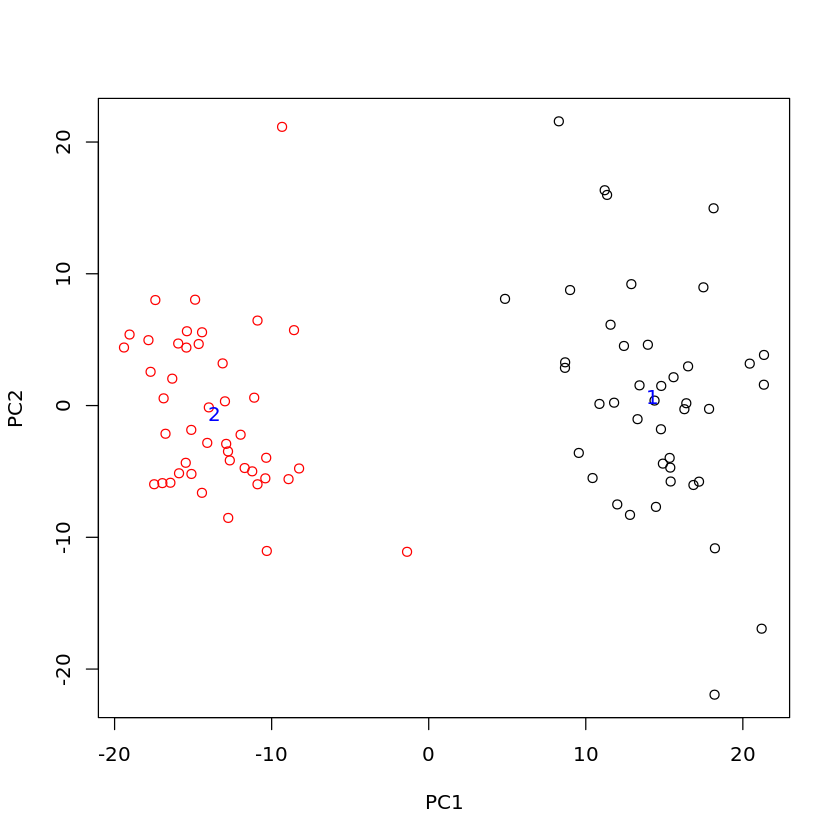

In [30]:
my_clust<-kmeans(prgenexp$x[,c(1:2)],2)
plot(prgenexp$x[,c(1,2)],col=my_clust$cluster)
text(x=my_clust$centers[,1],y=my_clust$centers[,2],
     cex=1, labels=(1:nrow(my_clust$centers)),col="blue")

table(genexp4$X, my_clust$cluster)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message:
“Removed 2 rows containing missing values (geom_path).”

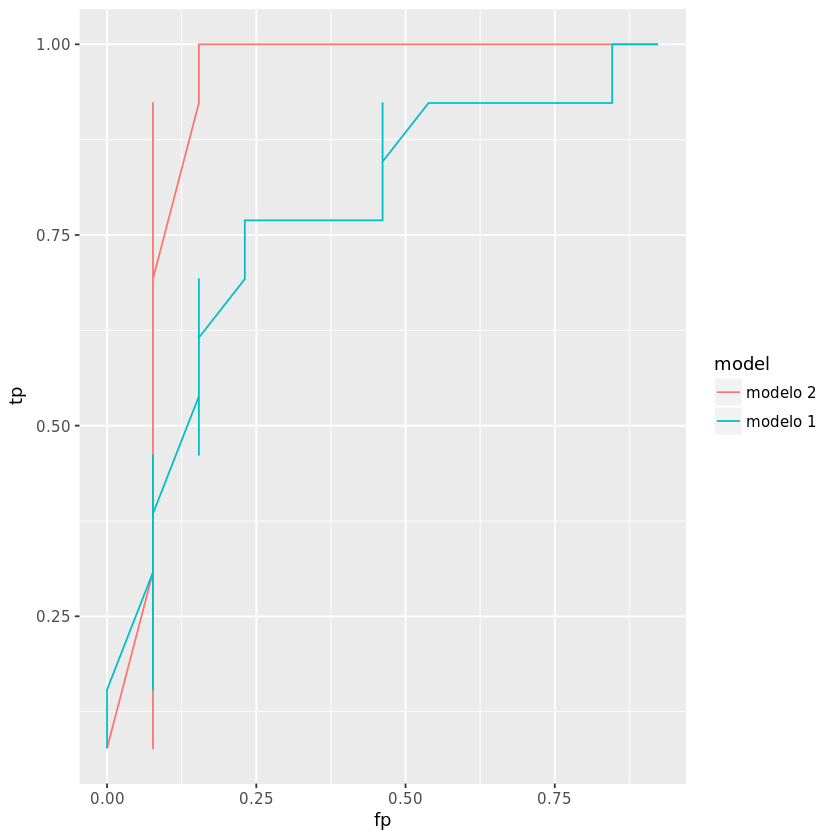

In [31]:
#curva ROC
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_normal<-y_real==1
    idx_cancer <-y_real==0

    M<-table(y_est,test$X)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}


model2<-glm(data=train_pca,formula=genexp4.X~.,family=binomial(link='logit'))
y_predict<-predict(model2,test_pca)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="modelo 2")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,test_pca$genexp4.X,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}



model1<-glm(data=train,formula=X~.,family=binomial(link='logit'))
y_predict<-predict(model1,test)
dfROC2<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="modelo 1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,test$X,dfROC2$th[i])
    dfROC2$tp[i]<-v["tp"]
    dfROC2$fp[i]<-v["fp"]
}
dfROC<-rbind(dfROC,dfROC2)
dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp, color = model))+geom_path()
